In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="whitegrid")
sns.set_palette("tab10")
matplotlib.rcParams['figure.figsize'] = (10, 5)

In [3]:
df = pd.read_csv('results.csv', sep=';')

In [4]:
def GenerateName(row):
    if row.NN == 1:
        nn_id = 2
    else:
        nn_id = 3
    if row.Shortened == 0:
        return f'NN{nn_id}_complete'
    else:
        return f'NN{nn_id}_shortened_{row.WindowSize}'

In [5]:
df['Name'] = df[['NN', 'Shortened', 'WindowSize']].apply(GenerateName, axis=1)

In [6]:
df['EliminatedCEX'] = df['NumCEX'] - df['RemainingCEX']

In [7]:
df['EliminationRatio'] = round(((df['EliminatedCEX'] / df['NumCEX']) * 100), 2)

In [8]:
df.head()

,NN,Shortened,WindowSize,TrainingTime,TrainingError,ValidationError,NumCEX,RemainingCEX,Iteration,Name,EliminatedCEX,EliminationRatio
0,1,0,0,20.462639,0.000160,0.000266,8,0,1,NN2_complete,8,100.00
1,1,0,0,14.377751,0.000463,0.000516,1,1,2,NN2_complete,0,0.00
2,1,0,0,565.210072,0.004298,0.004498,73,47,3,NN2_complete,26,35.62
3,1,0,0,246.024823,0.000458,0.000606,49,9,4,NN2_complete,40,81.63
4,1,0,0,39.557374,0.000315,0.001217,13,1,5,NN2_complete,12,92.31


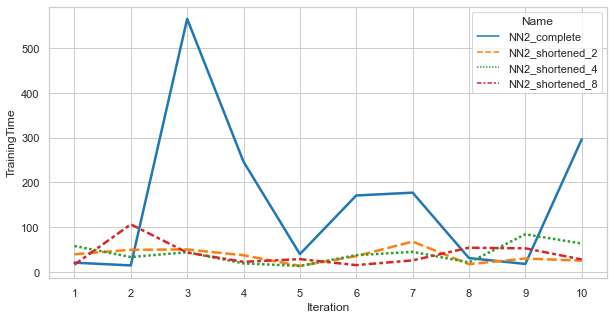

In [10]:
sns.lineplot(data=df[df.NN == 1], x='Iteration', y='TrainingTime', hue='Name', linewidth=2.5, style="Name")
matplotlib.pyplot.xticks(list(range(1,11)))
plt.show()

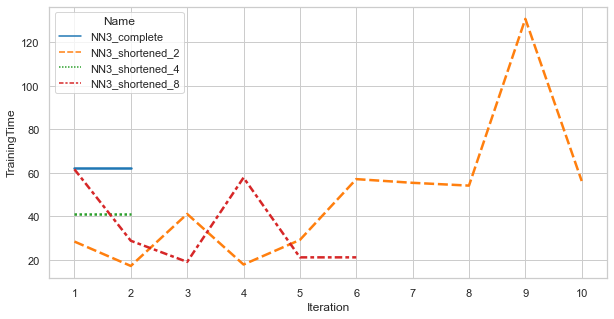

In [11]:
sns.lineplot(data=df[df.NN == 3], x='Iteration', y='TrainingTime', hue='Name', linewidth=2.5, style="Name")
matplotlib.pyplot.xticks(list(range(1,11)))
plt.show()

<ipython-input-12-01a90b11b1b0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=df1[df.WindowSize != 4], x='Iteration', y='ValidationError', hue='Name', linewidth=2.5, style="Name")


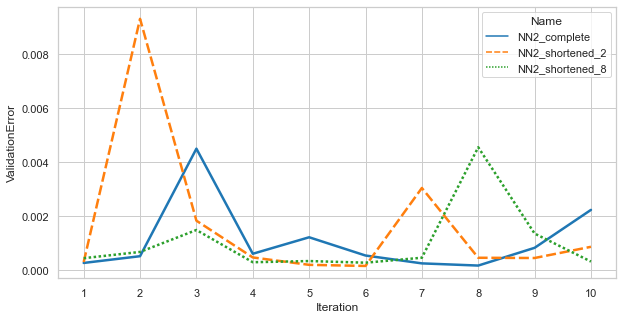

In [12]:
df1 = df[df.NN == 1]
sns.lineplot(data=df1[df.WindowSize != 4], x='Iteration', y='ValidationError', hue='Name', linewidth=2.5, style="Name")
matplotlib.pyplot.xticks(list(range(1,11)))
plt.show()

<ipython-input-13-194b026ee8ad>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=df1[df.WindowSize != 4], x='Iteration', y='NumCEX', hue='Name', linewidth=2.5, style="Name")


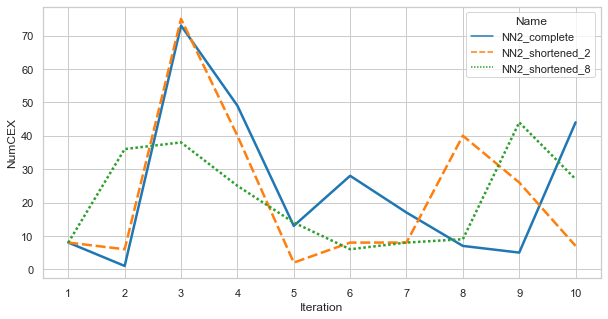

In [13]:
df1 = df[df.NN == 1]
sns.lineplot(data=df1[df.WindowSize != 4], x='Iteration', y='NumCEX', hue='Name', linewidth=2.5, style="Name")
matplotlib.pyplot.xticks(list(range(1,11)))
plt.show()

<ipython-input-14-f005e640722e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=df1[df.WindowSize != 4], x='Iteration', y='EliminationRatio', hue='Name', linewidth=2.5, style="Name")


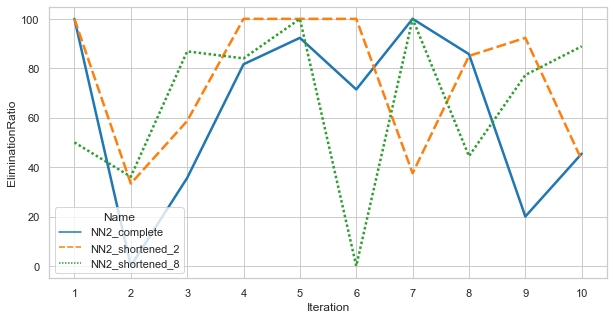

In [14]:
df1 = df[df.NN == 1]
sns.lineplot(data=df1[df.WindowSize != 4], x='Iteration', y='EliminationRatio', hue='Name', linewidth=2.5, style="Name")
matplotlib.pyplot.xticks(list(range(1,11)))
plt.show()

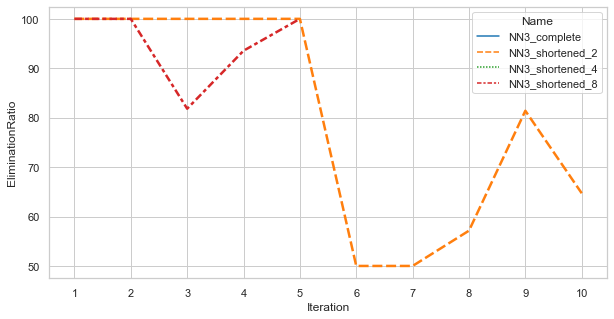

In [15]:
sns.lineplot(data=df[df.NN == 3], x='Iteration', y='EliminationRatio', hue='Name', linewidth=2.5, style="Name")
matplotlib.pyplot.xticks(list(range(1,11)))
plt.show()

In [26]:
df2 = df[df.NN == 3]
df1 = df2[df2.WindowSize.isin([0, 4])]
df1 = df1[df1.NumCEX != 0]
df1 = df1[['Name', 'TrainingTime', 'TrainingError', 'ValidationError', 'NumCEX']]
df1

,Name,TrainingTime,TrainingError,ValidationError,NumCEX
40,NN3_complete,62.139726,0.000120,0.000122,12
52,NN3_shortened_4,40.899304,0.000164,0.000221,12
